# Kaon decays to X

### Imports

In [1]:
import matplotlib.pyplot as plt

from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import sys
sys.path.append('../')
from alplib.cross_section_mc import *

from three_body_amplitudes import *

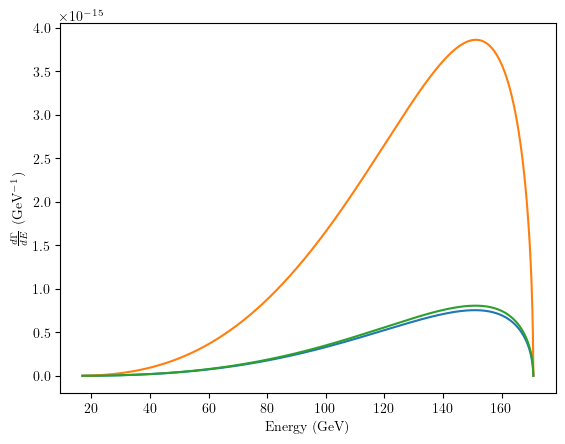

In [2]:
mtrx_KLpi0pi0 = KL_to_pi0_pi0_X(mX=17.0, coupling_combination=1.0)
mtrx_KLpimpip = KL_to_pip_pim_X(mX=17.0, coupling_combination=1.0)
mtrx_KPlusPipPi0 = Kp_to_pip_pi0_X(mX=17.0, coupling_combination=1.0)

decay_KL_pi0pi0 = Decay3Body(mtrx_KLpi0pi0,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=100000)

decay_KL_pippim = Decay3Body(mtrx_KLpimpip,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=100000)

decay_KPlus_pippi0 = Decay3Body(mtrx_KPlusPipPi0,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=100000)


energy_endpoint = (M_K**2 + mtrx_KLpi0pi0.mX**2 - 4*M_PI0**2)/(2*M_K)
energies = np.linspace(mtrx_KLpi0pi0.mX+0.001, energy_endpoint, 1000)
dGammas_pi0pi0 = np.array([decay_KL_pi0pi0.dGammadE3(ex) for ex in energies])

energy_endpoint = (M_K**2 + mtrx_KLpimpip.mX**2 - 4*M_PI**2)/(2*M_K)
energies = np.linspace(mtrx_KLpimpip.mX+0.001, energy_endpoint, 1000)
dGammas_pippim = np.array([decay_KL_pippim.dGammadE3(ex) for ex in energies])

energy_endpoint = (M_K**2 + mtrx_KPlusPipPi0.mX**2 - (M_PI + M_PI0)**2)/(2*M_K)
energies = np.linspace(mtrx_KPlusPipPi0.mX+0.001, energy_endpoint, 1000)
dGammas_pi0pip = np.array([decay_KPlus_pippi0.dGammadE3(ex) for ex in energies])


plt.plot(energies, dGammas_pippim, label=r'$K_L \to \pi^+ \pi^- X$')
plt.plot(energies, dGammas_pi0pi0, label=r'$K_L \to \pi^0 \pi^0 X$')
plt.plot(energies, dGammas_pi0pip, label=r'$K_+ \to \pi^+ \pi^0 X$')

plt.xlabel('Energy (GeV)')
plt.ylabel(r'$\frac{d\Gamma}{dE}$ (GeV$^{-1}$)')
plt.show()

## compute widths per coupling at 17 MeV

In [3]:
F_PI/sqrt(2)

np.float64(92.06530291048847)

Compute constraints at 17 MeV

In [5]:
print(decay_KL_pippim.total_width/KLONG_WIDTH)
print(decay_KL_pi0pi0.total_width/KLONG_WIDTH)
print(r"BR for $K^+ \to \pi^+ \pi^0 X$ =", decay_KPlus_pippi0.total_width/KLONG_WIDTH)

print(KLONG_WIDTH)

KTEV_LIMIT_KLPI0PI0 = 6.6e-9

# K_L \to pi+ pi- e+ e- from NA48
NA48_LIMIT_KLPIPI_ERR = 0.2e-7
NA48_LIMIT_KLPIPI_CV = 3.08e-7


print("K_L -> pi0 pi0 X limit: ", np.sqrt((KTEV_LIMIT_KLPI0PI0)/(decay_KL_pi0pi0.total_width/KLONG_WIDTH)))
print("K_L -> pi+ pi- X limit: ", np.sqrt((2*NA48_LIMIT_KLPIPI_ERR)/(decay_KL_pippim.total_width/KLONG_WIDTH)))


3.7910401731285193
19.91065884864935
BR for $K^+ \to \pi^+ \pi^0 X$ = 4.104911383552144
1.28655e-14
K_L -> pi0 pi0 X limit:  1.820661263288778e-05
K_L -> pi+ pi- X limit:  0.00010271900463573208


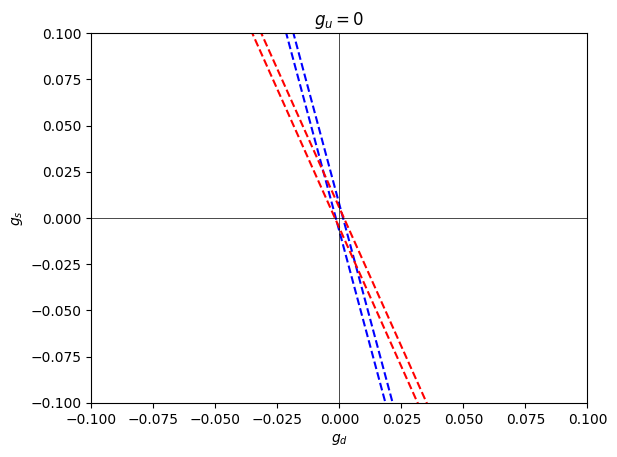

In [12]:
# K_L -> pi+ pi- X coupling combo: (5 g_d + g_s - 2 g_u)
# K_L -> pi0 pi0 X coupling combo: (g_d + g_s/3)


# plot contours of limits in g_s vs g_d plane, g_u=0
gd = np.linspace(-1e-2, 1e-2, 401)
gs = np.linspace(-1e-2, 1e-2, 401)
Gd, Gs = np.meshgrid(gd, gs)
g_u = 0.0
combo_pippim = (5*Gd + Gs - 2*g_u)
combo_pi0pi0 = (Gs/3 + Gd)
limit_pippim = np.sqrt((NA48_LIMIT_KLPIPI_ERR)/(decay_KL_pippim.total_width/KLONG_WIDTH))
limit_pi0pi0 = np.sqrt((KTEV_LIMIT_KLPI0PI0)/(decay_KL_pi0pi0.total_width/KLONG_WIDTH))
plt.contour(Gd*1e2, Gs*1e2, combo_pippim, levels=[-limit_pippim, limit_pippim], colors='blue', linestyles='dashed')
plt.contour(Gd*1e2, Gs*1e2, combo_pi0pi0, levels=[-limit_pi0pi0, limit_pi0pi0], colors='red', linestyles='dashed')
plt.xlabel(r'$g_d$')
plt.ylabel(r'$g_s$')
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title(r"$g_u = 0$")
plt.show()

[9.62777436e-08 6.84582265e-07 1.65325196e-05 ... 1.36911926e-07
 2.43584560e-05 0.00000000e+00]


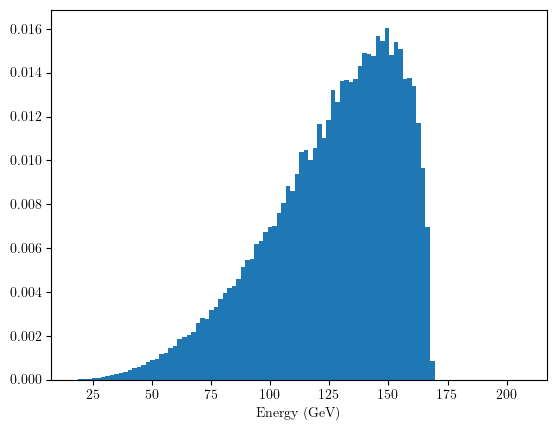

In [5]:
decay_KL_pi0pi0.simulate_decay()
decay_KL_pippim.simulate_decay()

energies = np.array([decay_KL_pippim.p3_lab_4vectors[i].energy() for i in range(decay_KL_pippim.n_samples)])

print(decay_KL_pippim.weights)

plt.hist(energies, weights=decay_KL_pippim.weights, bins=100, density=True)
plt.xlabel('Energy (GeV)')
plt.show()

## $K^+ \to \pi^+ \pi^0 X(\to e^+ e^-)$ sensitivity from NA48/2

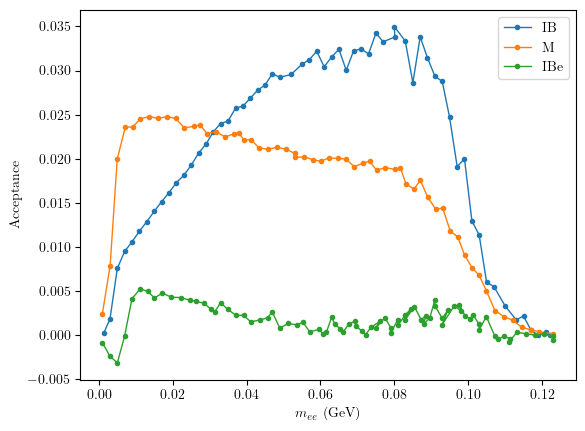

In [3]:
na482_IB_dat = np.genfromtxt("data/IB_accept_NA48-2.txt")
na482_M_dat = np.genfromtxt("data/M_accept_NA48-2.txt")
na482_IBe_dat = np.genfromtxt("data/IBe_accept_NA48-2.txt")

plt.plot(na482_IB_dat[:,0], na482_IB_dat[:,1], label='IB', linewidth=1.0, marker='.')
plt.plot(na482_M_dat[:,0], na482_M_dat[:,1], label='M', linewidth=1.0, marker='.')
plt.plot(na482_IBe_dat[:,0], na482_IBe_dat[:,1], label='IBe', linewidth=1.0, marker='.')
plt.xlabel(r'$m_{ee}$ (GeV)')
plt.ylabel('Acceptance')
plt.legend()
plt.show()

Limit at 17 MeV

In [4]:
# interpolate the acceptances
def NA482_IB_acceptance(mX_MeV):
    return abs(np.interp(mX_MeV, 1e3*na482_IB_dat[:,0], na482_IB_dat[:,1], left=0.0, right=0.0))

def NA482_IBe_acceptance(mX_MeV):
    return abs(np.interp(mX_MeV, 1e3*na482_IBe_dat[:,0], na482_IBe_dat[:,1], left=0.0, right=0.0))

def NA482_M_acceptance(mX_MeV):
    return abs(np.interp(mX_MeV, 1e3*na482_M_dat[:,0], na482_M_dat[:,1], left=0.0, right=0.0))

NA48_LIMIT_KPLUS_PIPI0_ERR = 0.14e-6  # 1 sigma error

ib_accept_17 = NA482_IB_acceptance(17.0)
ibe_accept_17 = NA482_IBe_acceptance(17.0)
m_accept_17 = NA482_M_acceptance(17.0)

br_Kplus_pippi0_X17 = decay_KPlus_pippi0.total_width/KLONG_WIDTH

bound_IB = np.sqrt((2*NA48_LIMIT_KPLUS_PIPI0_ERR)/br_Kplus_pippi0_X17/ib_accept_17)
bound_IBe = np.sqrt((2*NA48_LIMIT_KPLUS_PIPI0_ERR)/br_Kplus_pippi0_X17/ibe_accept_17)
bound_M = np.sqrt((2*NA48_LIMIT_KPLUS_PIPI0_ERR)/br_Kplus_pippi0_X17/m_accept_17)

print("IB bound on the coupling combo = ", bound_IB)
print("IBe bound on the coupling combo = ", bound_IBe)
print("M bound on the coupling combo = ", bound_M)

IB bound on the coupling combo =  0.0021226265886382864
IBe bound on the coupling combo =  0.0038048463398530105
M bound on the coupling combo =  0.001663199622622218


### $K^+ \to \pi^+ \pi^0 X(\to e^+ e^-)$ with mass spectrum

### Check the X17 spectra

- $1.7 \times 10^{11}$ Kaon decays total
- Sample of $16.3 \times 10^{6}$ $K_{2\pi D}$ decays
- 4919 signal events over ~17000 bkg

Our signal yield should be:

$N_X = 1.7 \times 10^{11} \times \varepsilon(m_{ee}) \times BR(K^+ \to \pi^+ \pi^0 X)$

modulo a reconstructed $m_{ee}$ resolution

## Read in the data and set histograms and acceptances

In [5]:
na48_kplus_bkg_dat = np.genfromtxt("data/NA48/KPlus_pip_pi0_bkg_mee.txt", skip_header=1)
na48_kplus_data_dat = np.genfromtxt("data/NA48/KPlus_pip_pi0_data_mee.txt", skip_header=1)

# mass resolution from https://arxiv.org/pdf/1504.00607
def na48_mass_res(mX):
    # returns mass resolution in mee
    return 0.067 + 0.0105*mX

N_kaons = 1.7e11

# SYSTEMATIC UNCERTAINTIES
# relative error on BR
total_systematic = 0.777e-2
total_external = 2.971e-2
total_stats = 1.486e-2

#bins
mass_bins = np.arange(2.0, 112.0 + 2.0, 2.0)
mass_bin_centers = (mass_bins[1:] + mass_bins[:-1])/2

sum_data = np.sum(na48_kplus_data_dat[:,1])
bkg_hist, _ = np.histogram(mass_bin_centers, weights=na48_kplus_bkg_dat[:,1], bins=mass_bins)

#uncertainties
r_syst = total_systematic / total_stats
r_ext = total_external / total_stats

sigma_syst_bin_sq = np.power(total_systematic * bkg_hist, 2) #r_syst**2 * sum_data / (mass_bins.shape[0]-1)
sigma_ext_bin_sq = np.power(total_external * bkg_hist, 2) # r_ext**2 * sum_data / (mass_bins.shape[0]-1)


[79.99852435 81.41767515 80.27089443 ... 81.74343652 79.35976073
 79.73070478]


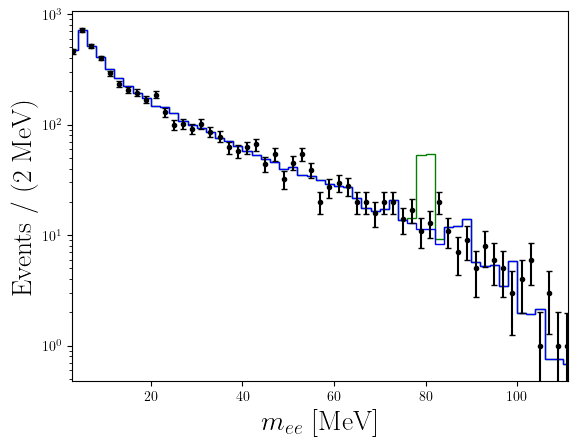

In [6]:
mtrx_KPlusPipPi0 = Kp_to_pip_pi0_X(mX=80.0, coupling_combination=1.0)

decay_KPlus_pippi0 = Decay3Body(mtrx_KPlusPipPi0,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=100000)

br = decay_KPlus_pippi0.partial_width() / KAON_WIDTH

from scipy.stats import norm

gaussian_spread = np.clip(norm.rvs(size=10000, loc=mtrx_KPlusPipPi0.mX,
                                   scale=na48_mass_res(mtrx_KPlusPipPi0.mX)), a_min=0.0, a_max=None)

print(gaussian_spread)
weights = (br / 10000) * np.ones(10000)




plt.hist([mass_bin_centers, gaussian_spread],
         weights=[na48_kplus_bkg_dat[:,1], 100000*weights*NA482_IB_acceptance(gaussian_spread)],
         bins=mass_bins, stacked=True, histtype='step', color=['b', 'g'])


plt.errorbar(mass_bin_centers, na48_kplus_data_dat[:,1],
             yerr=np.sqrt(na48_kplus_data_dat[:,1]), marker='.',
             capsize=2.0, linestyle='none', color='k')
#plt.hist(mass_bin_centers, weights=na48_kplus_bkg_dat[:,1], bins=mass_bins, histtype='step')
plt.yscale('log')
plt.xlim((na48_kplus_bkg_dat[0,0], na48_kplus_bkg_dat[-1,0]))
plt.xlabel(r"$m_{ee}$ [MeV]", fontsize=20)
plt.ylabel(r"Events / (2 MeV)", fontsize=20)
plt.show()

In [11]:
print(np.sum(na48_kplus_data_dat[:,1]))
print("relative stat error = ", np.sqrt(np.sum(na48_kplus_data_dat[:,1]))/np.sum(na48_kplus_data_dat[:,1]))

4928.166627714
relative stat error =  0.014244831233225758


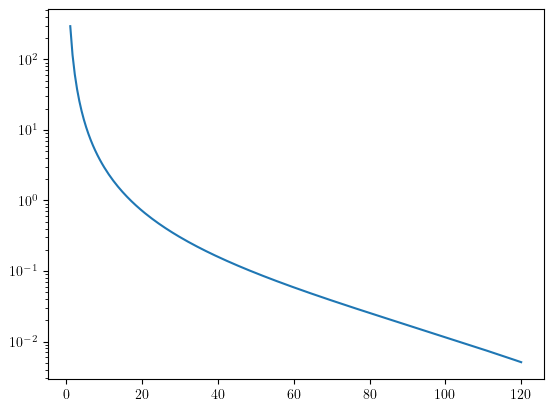

In [7]:
masses = np.linspace(1.0, 120, 200)
mtrx_KPlusPipPi0_iter = Kp_to_pip_pi0_X(mX=1.0, coupling_combination=1.0)

decay_KPlus_pippi0_iter = Decay3Body(mtrx_KPlusPipPi0_iter,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=100000)
brs = []
for m in masses:
    decay_KPlus_pippi0_iter.set_masses(m3=m)

    br = decay_KPlus_pippi0_iter.partial_width()/KAON_WIDTH
    brs.append(br)


plt.plot(masses, brs)
plt.yscale('log')
plt.show()

### Get the limit as a function of mass using chi^2

In [8]:
masses = np.linspace(1.0, 120, 200)
couplings = np.logspace(-8, 0, 200)

mtrx_KPlusPipPi0_iter = Kp_to_pip_pi0_X(mX=17.0, coupling_combination=1.0)

decay_KPlus_pippi0_iter = Decay3Body(mtrx_KPlusPipPi0_iter,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=100000)

ib_lim = []
ibe_lim = []
m_lim = []
mass_list = []
coupling_list = []

n_evts = []

mass_bins = np.arange(2.0, 112.0 + 2.0, 2.0)
mass_bin_centers = (mass_bins[1:] + mass_bins[:-1])/2
n_samples = 10000


N_kaons = 1.7e11

for m in masses:
    decay_KPlus_pippi0_iter.set_masses(m3=m)

    br = decay_KPlus_pippi0_iter.total_width/KAON_WIDTH

    sigma_m = na48_mass_res(m)

    gaussian_spread = np.clip(norm.rvs(size=n_samples, loc=m, scale=sigma_m), a_min=0.0, a_max=None)
    signal_wgts_IB = N_kaons * (br / n_samples) * NA482_IB_acceptance(gaussian_spread)
    signal_wgts_IBe = N_kaons * (br / n_samples) * NA482_IBe_acceptance(gaussian_spread)
    signal_wgts_M = N_kaons * (br / n_samples) * NA482_M_acceptance(gaussian_spread)

    IB_signal_hist, _ = np.histogram(gaussian_spread, weights=signal_wgts_IB, bins=mass_bins)
    IBe_signal_hist, _ = np.histogram(gaussian_spread, weights=signal_wgts_IBe, bins=mass_bins)
    M_signal_hist, _ = np.histogram(gaussian_spread, weights=signal_wgts_M, bins=mass_bins)

    for g in couplings:
        ib_signal_rewgt = (g**2) * IB_signal_hist
        ibe_signal_rewgt = (g**2) * IBe_signal_hist
        m_signal_rewgt = (g**2) * M_signal_hist

        error_sq = abs(na48_kplus_data_dat[:,1]) + sigma_syst_bin_sq + sigma_ext_bin_sq

        chi2_ib = np.sum((ib_signal_rewgt + bkg_hist - na48_kplus_data_dat[:,1])**2 / error_sq)
        chi2_ibe = np.sum((ibe_signal_rewgt + bkg_hist - na48_kplus_data_dat[:,1])**2 / error_sq)
        chi2_m = np.sum((m_signal_rewgt + bkg_hist - na48_kplus_data_dat[:,1])**2 / error_sq)

        ib_lim.append(chi2_ib)
        ibe_lim.append(chi2_ibe)
        m_lim.append(chi2_m)
        mass_list.append(m)
        coupling_list.append(g)
        n_evts.append(np.sum(ib_signal_rewgt))


out_array = np.array([mass_list, coupling_list, ib_lim, ibe_lim, m_lim, n_evts]).transpose()
np.savetxt("limits/NA48-2_KPlus_limits.txt", out_array)

0.00010821456924126947


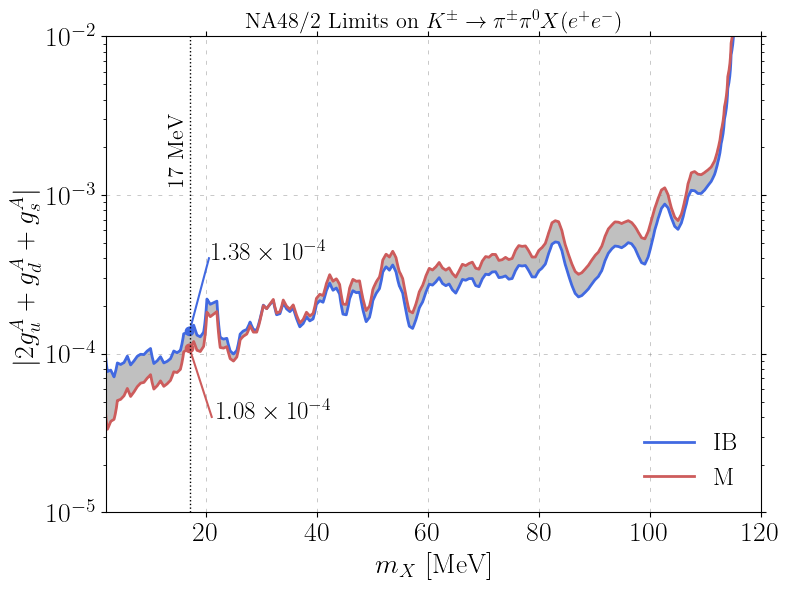

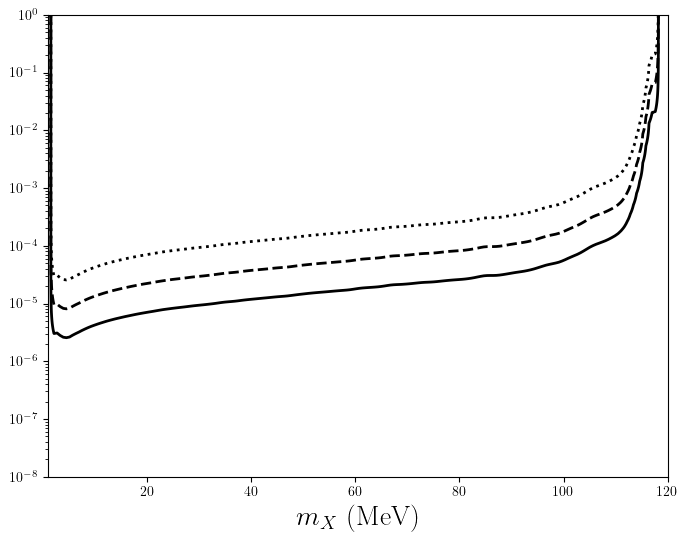

In [26]:
from matplotlib.lines import Line2D
chi2_dat = np.genfromtxt("limits/NA48-2_KPlus_limits.txt")

m_dat = chi2_dat[:,0]
g_dat = chi2_dat[:,1]

total_errors = np.sqrt(abs(na48_kplus_data_dat[:,1]) + sigma_syst_bin_sq + sigma_ext_bin_sq)
chi2_null = np.sum((bkg_hist - na48_kplus_data_dat[:,1])**2 / total_errors**2)

m_unique = np.unique(m_dat)
# look in slices of constant m and subtract the min chi2 value
for m in m_unique:
    mask = (m_dat == m)
    chi2_dat[mask,2] = chi2_dat[mask,2] - min(chi2_dat[mask,2])
    chi2_dat[mask,3] = chi2_dat[mask,3] - min(chi2_dat[mask,3])
    chi2_dat[mask,4] = chi2_dat[mask,4] - min(chi2_dat[mask,4])


ib_chi2 = chi2_dat[:,2]
ibe_chi2 = chi2_dat[:,3]
m_chi2 = chi2_dat[:,4]

MX, G = np.meshgrid(np.unique(m_dat),np.unique(g_dat))
CHI2_IB = np.reshape(ib_chi2, (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))
CHI2_IBE = np.reshape(ibe_chi2, (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))
CHI2_M = np.reshape(m_chi2, (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))

EVENTS = np.reshape(chi2_dat[:,5], (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))

CL = 2.3
CL2_1PARAM = 9.0
CL2 = 6.18
CL3 = 11.83
colors = ['k', 'royalblue', 'indianred']

fig, ax = plt.subplots(figsize=(8,6))    

y_min = 1e-5
y_max = 1e-2

c_ib = plt.contour(MX, G, CHI2_IB.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[1]],
                    alpha=1.0, linewidths=2.0, linestyles=['solid', 'dashed', 'dotted'])

#c_ibe = ax.contour(MX, G, CHI2_IBE.transpose(),
#                            levels=[CL2_1PARAM], colors=[colors[1]],
#                            alpha=1.0, linewidths=2.0, linestyles=['solid', 'dashed', 'dotted'])

c_m = plt.contour(MX, G, CHI2_M.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[2]],
                    alpha=1.0, linewidths=2.0, linestyles=['solid', 'dashed', 'dotted'])


# fill between two contour lines
def extract_contour_paths(contour_obj):
    polygons = []
    for seg in contour_obj.allsegs[0]:
        tmp_x = seg[:,0]
        tmp_y = seg[:,1]
    return polygons

c_m_lines_x = c_m.allsegs[0][0][:,0]
c_m_lines_y = c_m.allsegs[0][0][:,1]
c_ib_lines_x = c_ib.allsegs[0][0][:,0]
c_ib_lines_y = c_ib.allsegs[0][0][:,1]

# extract paths from contour
def interp_m(mX):
    return np.interp(mX, c_m_lines_x, c_m_lines_y)

def interp_ib(mX):
    return np.interp(mX, c_ib_lines_x, c_ib_lines_y)

mX_vals = np.linspace(0.0, 120.0, 1000)

plt.fill_between(mX_vals, interp_m(mX_vals), interp_ib(mX_vals), color='silver')

lim_X17_IB = interp_ib(17.0)
lim_X17_M = interp_m(17.0)
print(lim_X17_M)

plt.text(22.0, 4e-5, r"$1.08 \times 10^{-4}$", fontsize=18)
plt.text(21.0, 4e-4, r"$1.38 \times 10^{-4}$", fontsize=18)
plt.scatter([17.0, 17.0], [lim_X17_IB, lim_X17_M], color=[colors[1], colors[2]], marker="o")
plt.plot([17.0, 20.5], [lim_X17_IB, 4.0e-4], color=colors[1])
plt.plot([17.0, 21.0], [lim_X17_M, 4.0e-5], color=colors[2])


# Plot markers and text
ax.vlines(17.0, ymin=y_min, ymax=y_max, linewidth=1.0, color='k', alpha=1.0, linestyle='dotted')

ax.text(13.0, 1.2e-3, "17 MeV", rotation=90.0, fontsize=16)

ax.set_yscale('log')
ax.set_title(r"NA48/2 Limits on $K^\pm \to \pi^\pm \pi^0 X(e^+ e^-)$", fontsize=16)
ax.set_xlabel(r"$m_X$ [MeV]", fontsize=20)
ax.set_ylabel(r"$|2 g_u^A + g_d^A + g_s^A|$", fontsize=20)

ax.tick_params(axis='y', which='both', right=True, labelsize=20)
ax.tick_params(axis='x', which='both', top=True, labelsize=20)

# Set the grids
ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')

for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

custom_lines = [Line2D([0], [0], color=colors[1], lw=2.0),
                Line2D([0], [0], color=colors[2], lw=2.0)]

ax.set_ylim((y_min, y_max))
ax.set_xlim((2.0,120.0))
plt.legend(custom_lines, ['IB', 'M'], framealpha=0.0, loc="lower right", fontsize=18)

plt.tight_layout()
plt.savefig("plots/NA48_Kplus_pippi0_X_limits.pdf")
plt.show()


# plot # of events
fig, ax = plt.subplots(figsize=(8,6))
c_ib = ax.contour(MX, G, EVENTS.transpose(),
                            levels=[0.1, 1.0, 10.0], colors=[colors[0]],
                            alpha=1.0, linewidths=2.0, linestyles=['solid', 'dashed', 'dotted'])

ax.set_yscale('log')
ax.set_xlabel(r"$m_X$ (MeV)", fontsize=20)
plt.show()

Extract the limits at 17 MeV

In [14]:
ib_chi2_17 = ib_chi2[m_dat == 1.714572864321608137e+01]
gdat_17 = g_dat[m_dat == 1.714572864321608137e+01]

idx_2sigma = np.argmin(abs(ib_chi2_17 - min(ib_chi2_17) - 6.18))

crit_coupling_ib = gdat_17[idx_2sigma]
print("IB critical coupling = {}".format(crit_coupling_ib))

ibe_chi2_17 = ibe_chi2[m_dat == 1.714572864321608137e+01]
idx_2sigma = np.argmin(abs(ibe_chi2_17 - min(ibe_chi2_17) - 6.18))
crit_coupling_ibe = gdat_17[idx_2sigma]
print("IB-E critical coupling = {}".format(crit_coupling_ibe))

m_chi2_17 = m_chi2[m_dat == 1.714572864321608137e+01]
idx_2sigma = np.argmin(abs(m_chi2_17 - min(m_chi2_17) - 6.18))
crit_coupling_m = gdat_17[idx_2sigma]
print("M critical coupling = {}".format(crit_coupling_m))

IB critical coupling = 7.149428986597577e-06
IB-E critical coupling = 1.3667163564620073e-05
M critical coupling = 5.94113398496504e-06


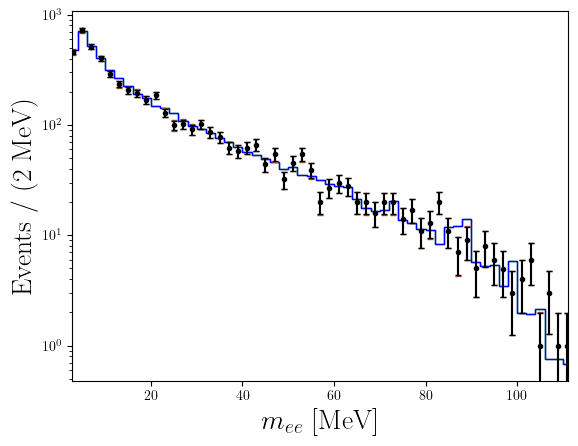

In [29]:
mtrx_KPlusPipPi0 = Kp_to_pip_pi0_X(mX=17.0, coupling_combination=1.0)

decay_KPlus_pippi0 = Decay3Body(mtrx_KPlusPipPi0,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=100000)

g = 4.0e-6
br = (g**2) * decay_KPlus_pippi0.partial_width() / KAON_WIDTH
weights = br * np.ones(10000) / 10000
gaussian_spread = np.clip(norm.rvs(size=10000, loc=mtrx_KPlusPipPi0.mX, scale=0.25), a_min=0.0, a_max=None)


plt.hist([mass_bin_centers, gaussian_spread],
         weights=[na48_kplus_bkg_dat[:,1], N_kaons*weights*NA482_IB_acceptance(gaussian_spread)],
         bins=mass_bins, stacked=True, histtype='step', color=['b', 'g'])


plt.errorbar(mass_bin_centers, na48_kplus_data_dat[:,1],
             yerr=np.sqrt(abs(na48_kplus_data_dat[:,1]) + sigma_syst_bin_sq + sigma_ext_bin_sq), marker='none',
             capsize=2.0, linestyle='none', color='sienna')
plt.errorbar(mass_bin_centers, na48_kplus_data_dat[:,1],
             yerr=np.sqrt(abs(na48_kplus_data_dat[:,1])), marker='.',
             capsize=2.0, linestyle='none', color='k')
#plt.hist(mass_bin_centers, weights=na48_kplus_bkg_dat[:,1], bins=mass_bins, histtype='step')
plt.yscale('log')
plt.xlim((na48_kplus_bkg_dat[0,0], na48_kplus_bkg_dat[-1,0]))
plt.xlabel(r"$m_{ee}$ [MeV]", fontsize=20)
plt.ylabel(r"Events / (2 MeV)", fontsize=20)
plt.show()

### subtracted plot

using mX =  17.0
EVENTS =  25.557450724657155


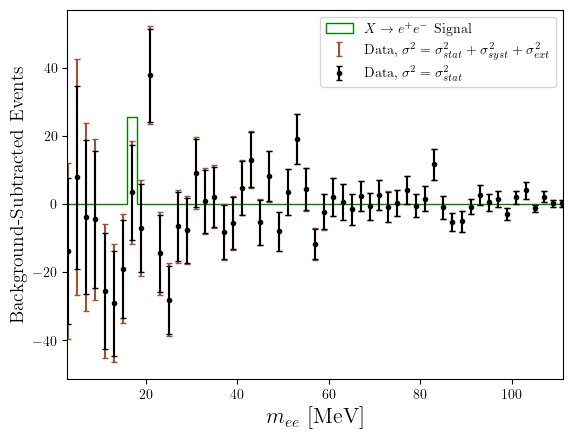

chi2 - chi2_min = 74.5942694556128 - 72.53195428559421 = 2.062315170018593


In [19]:
mtrx_KPlusPipPi0 = Kp_to_pip_pi0_X(mX=17.0, coupling_combination=1.0)

n_samples = 1000000

decay_KPlus_pippi0 = Decay3Body(mtrx_KPlusPipPi0,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=n_samples)

g = 1.0e-4
br = g**2 * decay_KPlus_pippi0.partial_width() / KAON_WIDTH

print("using mX = ", decay_KPlus_pippi0.m3)

weights = br / n_samples
sigma_m = na48_mass_res(mtrx_KPlusPipPi0.mX)
gaussian_spread = np.clip(norm.rvs(size=n_samples, loc=mtrx_KPlusPipPi0.mX, scale=sigma_m), a_min=0.0, a_max=None)

bkg_na48 = na48_kplus_bkg_dat[:,1]

total_errors = np.sqrt(abs(na48_kplus_data_dat[:,1]) + sigma_syst_bin_sq + sigma_ext_bin_sq)

signal_weights = N_kaons*weights*NA482_IB_acceptance(gaussian_spread)

signal_hist, _ = np.histogram(gaussian_spread, weights=signal_weights, bins=mass_bins)

print("EVENTS = ", np.sum(signal_hist))

plt.hist(mass_bin_centers, weights=signal_hist,
         bins=mass_bins, histtype='step', color=['g'], label=r"$X \to e^+ e^-$ Signal")

plt.errorbar(mass_bin_centers, na48_kplus_data_dat[:,1]-bkg_na48,
             yerr=total_errors, marker='none',
             capsize=2.0, linestyle='none', color='sienna', label=r"Data, $\sigma^2 = \sigma_{stat}^2 + \sigma_{syst}^2 + \sigma_{ext}^2$")
plt.errorbar(mass_bin_centers, na48_kplus_data_dat[:,1]-bkg_na48,
             yerr=np.sqrt(abs(na48_kplus_data_dat[:,1])), marker='.',
             capsize=2.0, linestyle='none', color='k', label=r"Data, $\sigma^2 = \sigma_{stat}^2$")
#plt.hist(mass_bin_centers, weights=na48_kplus_bkg_dat[:,1], bins=mass_bins, histtype='step')

plt.legend(loc="upper right")
plt.xlim((na48_kplus_bkg_dat[0,0], na48_kplus_bkg_dat[-1,0]))
plt.xlabel(r"$m_{ee}$ [MeV]", fontsize=16)
plt.ylabel(r"Background-Subtracted Events", fontsize=14)
plt.show()


# print Chi^2
chi2 = np.sum((signal_hist + bkg_na48 - na48_kplus_data_dat[:,1])**2 / total_errors**2)

chi2_null = np.sum((bkg_na48 - na48_kplus_data_dat[:,1])**2 / total_errors**2)

print("chi2 - chi2_min = {} - {} = {}".format(chi2, chi2_null, chi2 - chi2_null))

# $K_{L,S} \to \pi^+ \pi^- e^+ e^-$ NA48/2

Eur. Phys. J. C 30, 33–49 (2003)
Digital Object Identiﬁer (DOI) 10.1140/epjc/s2003-01252-y

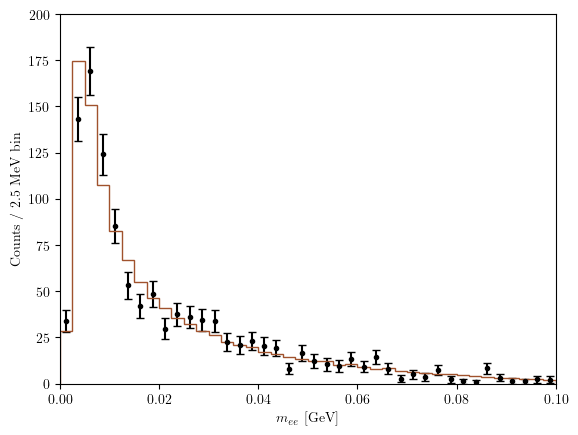

In [7]:
bkg_mee_KL_pip_pim = np.genfromtxt("data/NA48/KL_pip_pim_bkg_mee.txt")
data_mee_KL_pip_pim = np.genfromtxt("data/NA48/KL_pip_pim_data_mee.txt")

bins_mee_KL_pip_pim = np.arange(0, 0.1025, 0.0025)
centers_mee_KL_pip_pim = (bins_mee_KL_pip_pim[1:] + bins_mee_KL_pip_pim[:-1])/2


plt.errorbar(data_mee_KL_pip_pim[:,0], data_mee_KL_pip_pim[:,1],
             yerr=np.sqrt(1 + data_mee_KL_pip_pim[:,1]),
             ls='none', marker='.', capsize=3, color='k')

plt.hist(centers_mee_KL_pip_pim, weights=bkg_mee_KL_pip_pim[:,1],
         bins=bins_mee_KL_pip_pim, histtype='step', color='sienna')

plt.xlabel(r"$m_{ee}$ [GeV]")
plt.ylabel("Counts / 2.5 MeV bin")
plt.xlim((0.0, 0.1))
plt.ylim((0.0, 200.0))
plt.show()

Work out the $N_{kaons} \times \epsilon$ acceptance:
- we only know the total number of triggers, not the efficiency
- we do know that $N(\pi^+ \pi^- \pi^0_D)$ = 0.738e6 after selection cuts
can we say that 

$N(K_L \to \pi^+ \pi^- \pi^0_D) = \epsilon \times BR(K_L \to \pi^+ \pi^- \pi^0_D) \times N_{K_L}$ 

and solve for the combination $\epsilon \times N_{K_L}$ for an efficiency $\epsilon$ ?
This would then assume that efficiency applies equally to X17 events if we scale X17 events as

$N(K_L \to \pi^+ \pi^- X) = \epsilon N_{K_L} \times BR(K_L \to \pi^+ \pi^- X)$

e.g. the $\pi^+ \pi^- \pi^0$ mode has a BR of 12.54e-2. The dalitz pi0 mode has 1.174%, so the mode

$BR(K_L \to \pi^+ \pi^- \pi^0_D) = 0.001472$ 

In [10]:
N_kaons_KL_pippim_accept = 0.738e6 / 0.001472
print(N_kaons_KL_pippim_accept)

501358695.65217394


print the number of events

In [3]:
print(np.sum(data_mee_KL_pip_pim[:,1]))

1119.8721173846748


Subtracted data

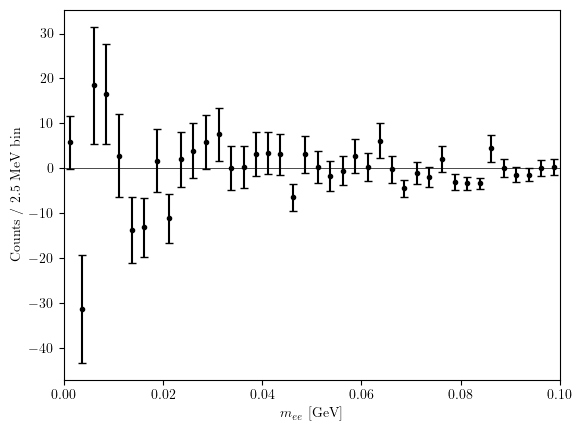

In [3]:
plt.errorbar(data_mee_KL_pip_pim[:,0], data_mee_KL_pip_pim[:,1] - bkg_mee_KL_pip_pim[:,1],
             yerr=np.sqrt(1 + data_mee_KL_pip_pim[:,1]),
             ls='none', marker='.', capsize=3, color='k')
plt.hlines(0.0, xmin=0.0, xmax=0.1, color='k', linewidth=0.5)

plt.xlabel(r"$m_{ee}$ [GeV]")
plt.ylabel("Counts / 2.5 MeV bin")
plt.xlim((0.0, 0.1))

plt.show()

### plot spectra for at rest $K_L \to \pi^+ \pi^- X$

Kinematic cuts from NA48/2
Eur. Phys. J. C 30, 33–49 (2003)
Digital Object Identiﬁer (DOI) 10.1140/epjc/s2003-01252-y

* $E_e / p_e$ > 0.85
* $p_e > 2$ GeV
* $p_\pi > 5$ GeV
* $E_{K_{L,S}} > 40$ GeV
* $E_{K_{L}} < 140$ GeV

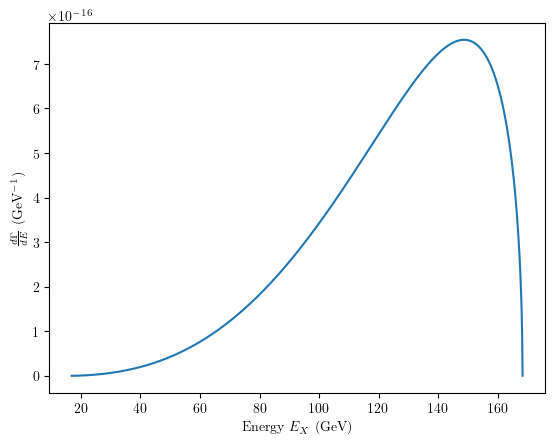

In [8]:
mtrx_KLpimpip = KL_to_pip_pim_X(mX=17.0, coupling_combination=1.0)

decay_KL_pippim = Decay3Body(mtrx_KLpimpip,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=100000)


energy_endpoint = (M_K**2 + mtrx_KLpimpip.mX**2 - 4*M_PI**2)/(2*M_K)
energies = np.linspace(mtrx_KLpimpip.mX+0.001, energy_endpoint, 1000)
dGammas_pippim = np.array([decay_KL_pippim.dGammadE3(ex) for ex in energies])



plt.plot(energies, dGammas_pippim, label=r'$K_L \to \pi^+ \pi^- X$')

plt.xlabel(r'Energy $E_X$ (GeV)')
plt.ylabel(r'$\frac{d\Gamma}{dE}$ (GeV$^{-1}$)')
plt.show()

using mX =  17.0
EVENTS =  4.599037462692197


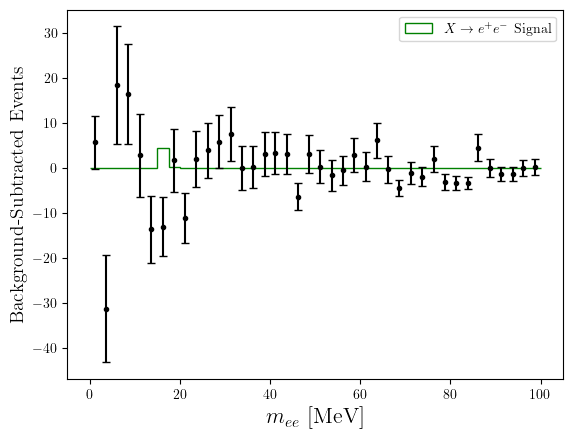

In [11]:
mtrx_KLPipPim = KL_to_pip_pim_X(mX=17.0, coupling_combination=1.0)

n_samples = 1000000

decay_KL_pippim = Decay3Body(mtrx_KLPipPim,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=n_samples)

g = 1.0e-4
br = g**2 * decay_KL_pippim.partial_width() / KAON_WIDTH

print("using mX = ", decay_KL_pippim.m3)

weights = br / n_samples
sigma_m = na48_mass_res(mtrx_KLPipPim.mX)
gaussian_spread = np.clip(norm.rvs(size=n_samples, loc=mtrx_KLPipPim.mX, scale=sigma_m), a_min=0.0, a_max=None)

signal_weights = N_kaons_KL_pippim_accept*weights*np.ones(n_samples)

signal_hist, _ = np.histogram(gaussian_spread, weights=signal_weights, bins=1e3*bins_mee_KL_pip_pim)

print("EVENTS = ", np.sum(signal_hist))

plt.hist(1e3*centers_mee_KL_pip_pim, weights=signal_hist,
         bins=1e3*bins_mee_KL_pip_pim, histtype='step', color=['g'], label=r"$X \to e^+ e^-$ Signal")

plt.errorbar(1e3*data_mee_KL_pip_pim[:,0], data_mee_KL_pip_pim[:,1] - bkg_mee_KL_pip_pim[:,1],
             yerr=np.sqrt(1 + data_mee_KL_pip_pim[:,1]),
             ls='none', marker='.', capsize=3, color='k')
plt.hlines(0.0, xmin=0.0, xmax=0.1, color='k', linewidth=0.5)
plt.legend(loc="upper right")
#plt.xlim((na48_kplus_bkg_dat[0,0], na48_kplus_bkg_dat[-1,0]))
plt.xlabel(r"$m_{ee}$ [MeV]", fontsize=16)
plt.ylabel(r"Background-Subtracted Events", fontsize=14)
plt.show()


First mass scan with no systematics:

In [12]:
masses = np.linspace(1.0, 120, 200)
couplings = np.logspace(-8, 0, 200)

mtrx_KLPipPim_iter = KL_to_pip_pim_X(mX=17.0, coupling_combination=1.0)

decay_KL_pippim_iter = Decay3Body(mtrx_KLPipPim_iter,
                            p=LorentzVector(M_K, 0., 0., 0.),
                            n_samples=500000)

ib_lim = []
ibe_lim = []
m_lim = []
mass_list = []
coupling_list = []

n_evts = []

mass_bins = bins_mee_KL_pip_pim*1e3
mass_bin_centers = centers_mee_KL_pip_pim*1e3
n_samples = 10000
data = data_mee_KL_pip_pim[:,1]
bkg_hist = bkg_mee_KL_pip_pim[:,1]

N_kaons = 1.7e11

for m in masses:
    decay_KL_pippim_iter.set_masses(m3=m)

    br = decay_KL_pippim_iter.total_width/KAON_WIDTH

    sigma_m = na48_mass_res(m)

    gaussian_spread = np.clip(norm.rvs(size=n_samples, loc=m, scale=sigma_m), a_min=0.0, a_max=None)
    signal_wgts_IB = N_kaons_KL_pippim_accept * (br / n_samples) * np.ones(n_samples)

    IB_signal_hist, _ = np.histogram(gaussian_spread, weights=signal_wgts_IB, bins=mass_bins)

    for g in couplings:
        ib_signal_rewgt = (g**2) * IB_signal_hist
        error_sq = abs(data)
        chi2_ib = np.sum((ib_signal_rewgt + bkg_hist - data)**2 / error_sq)

        ib_lim.append(chi2_ib)
        mass_list.append(m)
        coupling_list.append(g)
        n_evts.append(np.sum(ib_signal_rewgt))


out_array = np.array([mass_list, coupling_list, ib_lim]).transpose()
np.savetxt("limits/NA48-2_KL_pip_pim_limits_recalc.txt", out_array)

0.00015423462175972292


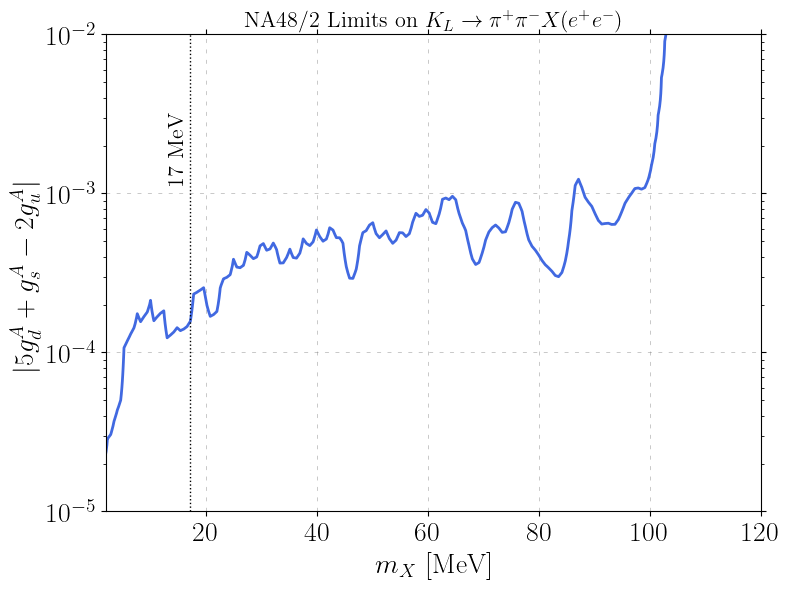

In [13]:
from matplotlib.lines import Line2D
chi2_dat = np.genfromtxt("limits/NA48-2_KL_pip_pim_limits_recalc.txt")

m_dat = chi2_dat[:,0]
g_dat = chi2_dat[:,1]

m_unique = np.unique(m_dat)
# look in slices of constant m and subtract the min chi2 value
for m in m_unique:
    mask = (m_dat == m)
    chi2_dat[mask,2] = chi2_dat[mask,2] - min(chi2_dat[mask,2])


ib_chi2 = chi2_dat[:,2]

MX, G = np.meshgrid(np.unique(m_dat),np.unique(g_dat))
CHI2_IB = np.reshape(ib_chi2, (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))
EVENTS = np.reshape(chi2_dat[:,2], (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))

CL = 2.3
CL2_1PARAM = 9.0
CL2 = 6.18
CL3 = 11.83
colors = ['k', 'royalblue']

fig, ax = plt.subplots(figsize=(8,6))    

y_min = 1e-5
y_max = 1e-2

c_ib = plt.contour(MX, G, CHI2_IB.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[1]],
                    alpha=1.0, linewidths=2.0, linestyles=['solid', 'dashed', 'dotted'])



# fill between two contour lines
def extract_contour_paths(contour_obj):
    polygons = []
    for seg in contour_obj.allsegs[0]:
        tmp_x = seg[:,0]
        tmp_y = seg[:,1]
    return polygons


c_ib_lines_x = c_ib.allsegs[0][0][:,0]
c_ib_lines_y = c_ib.allsegs[0][0][:,1]

# extract paths from contour
def interp_ib(mX):
    return np.interp(mX, c_ib_lines_x, c_ib_lines_y)

mX_vals = np.linspace(0.0, 120.0, 1000)


lim_X17_IB = interp_ib(17.0)
print(lim_X17_IB)


# Plot markers and text
ax.vlines(17.0, ymin=y_min, ymax=y_max, linewidth=1.0, color='k', alpha=1.0, linestyle='dotted')

ax.text(13.0, 1.2e-3, "17 MeV", rotation=90.0, fontsize=16)

ax.set_yscale('log')
ax.set_title(r"NA48/2 Limits on $K_L \to \pi^+ \pi^- X(e^+ e^-)$", fontsize=16)
ax.set_xlabel(r"$m_X$ [MeV]", fontsize=20)
ax.set_ylabel(r"$|5 g_d^A + g_s^A - 2 g_u^A|$", fontsize=20)

ax.tick_params(axis='y', which='both', right=True, labelsize=20)
ax.tick_params(axis='x', which='both', top=True, labelsize=20)

# Set the grids
ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')

for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

custom_lines = [Line2D([0], [0], color=colors[1], lw=2.0)]

ax.set_ylim((y_min, y_max))
ax.set_xlim((2.0,120.0))

plt.tight_layout()
plt.savefig("plots/NA48_KL_pippim_X_limits.pdf")
plt.show()



# $K_L \to \pi^0 \pi^0 X$

In [4]:
mtrx_KLpi0pi0 = KL_to_pi0_pi0_X(mX=17.0, coupling_combination=1.0)

decay_KL_pi0pi0 = Decay3Body(mtrx_KLpi0pi0,
                            p=LorentzVector(M_KLONG, 0., 0., 0.),
                            n_samples=500000)

KTeV_limit_KLpi0pi0ee_BR = 6.6e-9  # 90% CL

test_masses = np.linspace(2.0, 120.0, 100)
coupling_limits = []

for mX in test_masses:
    decay_KL_pi0pi0.set_masses(m3=mX)
    br = decay_KL_pi0pi0.total_width / KLONG_WIDTH
    coupling_limit = np.sqrt(KTeV_limit_KLpi0pi0ee_BR / br)
    coupling_limits.append(coupling_limit)

coupling_limits_KL_pi0pi0 = np.array(coupling_limits)

# output limits to textfile
out_array = np.array([test_masses, coupling_limits_KL_pi0pi0]).transpose()
np.savetxt("limits/KTeV_KL_pi0pi0_X_limits.txt", out_array)


# Combined plot

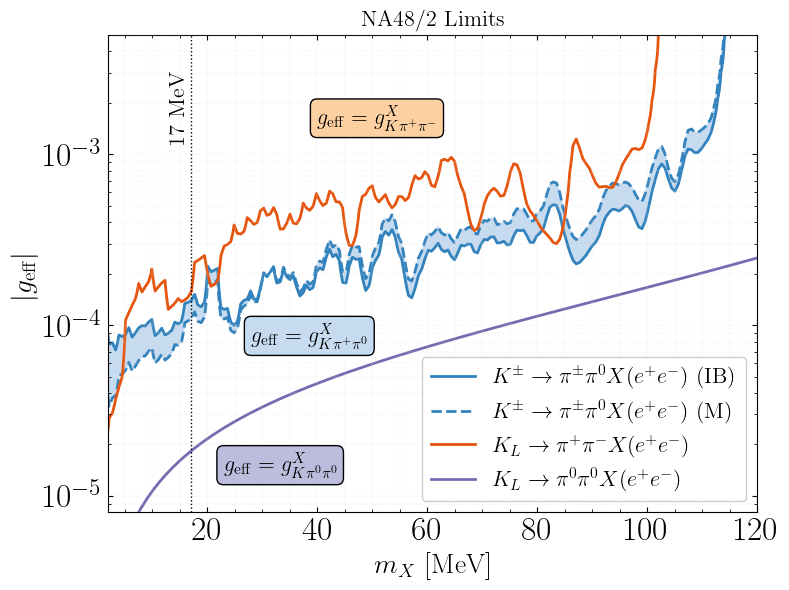

In [16]:
from matplotlib.lines import Line2D
cmap = plt.get_cmap('tab20c')

###################################################
# Load in all the limits

# K -> pi0 pi0
KTeV_KL_to_pi0pi0_limits = np.genfromtxt("limits/KTeV_KL_pi0pi0_X_limits.txt")

###################################################
# K+ to Pi+ Pi0 limits
chi2_dat = np.genfromtxt("limits/NA48-2_KPlus_limits.txt")

m_dat = chi2_dat[:,0]
g_dat = chi2_dat[:,1]

m_unique = np.unique(m_dat)
# look in slices of constant m and subtract the min chi2 value
for m in m_unique:
    mask = (m_dat == m)
    chi2_dat[mask,2] = chi2_dat[mask,2] - min(chi2_dat[mask,2])
    chi2_dat[mask,3] = chi2_dat[mask,3] - min(chi2_dat[mask,3])
    chi2_dat[mask,4] = chi2_dat[mask,4] - min(chi2_dat[mask,4])

ib_chi2 = chi2_dat[:,2]
m_chi2 = chi2_dat[:,4]

###################################################
# KL to Pi+ Pi- limits
chi2_dat_KLpippim = np.genfromtxt("limits/NA48-2_KL_pip_pim_limits_recalc.txt")

m_dat_2 = chi2_dat_KLpippim[:,0]
g_dat_2 = chi2_dat_KLpippim[:,1]

m_unique_2 = np.unique(m_dat_2)
# look in slices of constant m and subtract the min chi2 value
for m in m_unique_2:
    mask = (m_dat_2 == m)
    chi2_dat_KLpippim[mask,2] = chi2_dat_KLpippim[mask,2] - min(chi2_dat_KLpippim[mask,2])


chi2_KLpippim = chi2_dat_KLpippim[:,2]


###################################################
# Combine the limits and plot

# K+
MX, G = np.meshgrid(np.unique(m_dat),np.unique(g_dat))
CHI2_IB = np.reshape(ib_chi2, (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))
CHI2_M = np.reshape(m_chi2, (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))

# KL
MX2, G2 = np.meshgrid(np.unique(m_dat_2),np.unique(g_dat_2))
CHI2_KL_PIP_PIM = np.reshape(chi2_KLpippim, (np.unique(m_dat_2).shape[0],np.unique(g_dat_2).shape[0]))

CL = 2.3
CL2_1PARAM = 9.0
CL2 = 6.18
CL3 = 11.83
colors = [cmap(0), cmap(4), cmap(8), cmap(12)]



###################################################
# Begin figure

fig, ax = plt.subplots(figsize=(8,6))    

y_min = 8e-6
y_max = 5e-3

###################################################
# Plot contours and lines for limits for K+ and KL

# KL to pi0 pi0
ax.plot(KTeV_KL_to_pi0pi0_limits[:,0], KTeV_KL_to_pi0pi0_limits[:,1],
        color=cmap(12), linewidth=2.0, linestyle='solid')

# K+ to pi+ pi0
c_ib = ax.contour(MX, G, CHI2_IB.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[0]],
                    alpha=1.0, linewidths=2.0, linestyles=['solid'])

c_m = ax.contour(MX, G, CHI2_M.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[0]],
                    alpha=1.0, linewidths=2.0, linestyles=['dashed'])

# KL to pi+ pi-
c_kl = ax.contour(MX2, G2, CHI2_KL_PIP_PIM.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[1]], alpha=1.0, linewidths=2.0, linestyles=['solid'])


# fill between two contour lines
def extract_contour_paths(contour_obj):
    polygons = []
    for seg in contour_obj.allsegs[0]:
        tmp_x = seg[:,0]
        tmp_y = seg[:,1]
    return polygons

c_m_lines_x = c_m.allsegs[0][0][:,0]
c_m_lines_y = c_m.allsegs[0][0][:,1]
c_ib_lines_x = c_ib.allsegs[0][0][:,0]
c_ib_lines_y = c_ib.allsegs[0][0][:,1]

# extract paths from contour
def interp_m(mX):
    return np.interp(mX, c_m_lines_x, c_m_lines_y)

def interp_ib(mX):
    return np.interp(mX, c_ib_lines_x, c_ib_lines_y)

mX_vals = np.linspace(0.0, 120.0, 1000)

plt.fill_between(mX_vals, interp_m(mX_vals), interp_ib(mX_vals), color=cmap(3))

lim_X17_IB = interp_ib(17.0)
lim_X17_M = interp_m(17.0)


# Plot markers and text
ax.vlines(17.0, ymin=y_min, ymax=y_max, linewidth=1.0, color='k', alpha=1.0, linestyle='dotted')
ax.text(13.0, 1.2e-3, "17 MeV", rotation=90.0, fontsize=16)

ax.set_yscale('log')
ax.set_title(r"NA48/2 Limits", fontsize=16)
ax.set_xlabel(r"$m_X$ [MeV]", fontsize=20)
#ax.set_ylabel(r"$|2 g_u^A + g_d^A + g_s^A|$", fontsize=20)
ax.set_ylabel(r"$|g_{\rm eff}|$", fontsize=20)

# text boxes
# $g_{\rm eff} = 5 g_d^A + g_s^A - 2 g_u^A$  K+
#  2 g_u^A + g_d^A + g_s^A K_L pi+ pi-

ax.text(40, 1.5e-3, r"$g_{\rm eff} = g_{K\pi^+\pi^-}^X$",
        fontsize=16, bbox=dict(boxstyle='round', facecolor=cmap(7), alpha=1.0))
ax.text(28, 8e-5, r"$g_{\rm eff} = g_{K\pi^+\pi^0}^X$",
        fontsize=16, bbox=dict(boxstyle='round', facecolor=cmap(3), alpha=1.0))
ax.text(23, 1.4e-5, r"$g_{\rm eff} = g_{K\pi^0 \pi^0}^X$",
        fontsize=16, bbox=dict(boxstyle='round', facecolor=cmap(14), alpha=1.0))

# on $K^\pm \to \pi^\pm \pi^0 X(e^+ e^-)$

# Set the grids
ax.grid(True, linestyle='--', which="both", linewidth=0.2, alpha=1.0, color='gainsboro')
ax.minorticks_on()

# Major ticks (all sides)
ax.tick_params(axis='both', which='major',
            direction='in',
            labelsize=24,
            top=True, bottom=True, left=True, right=True)

# Minor ticks (all sides)
ax.tick_params(axis='both', which='minor',
            direction='in',
            top=True, bottom=True, left=True, right=True)
ax.set_axisbelow(False)  # <-- added


custom_lines = [Line2D([0], [0], color=colors[0], lw=2.0),
                Line2D([0], [0], color=colors[0], ls='dashed', lw=2.0),
                Line2D([0], [0], color=colors[1], lw=2.0),
                Line2D([0], [0], color=colors[3], lw=2.0)]

ax.set_ylim((y_min, y_max))
ax.set_xlim((2.0,120.0))
plt.legend(custom_lines, [r'$K^\pm \to \pi^\pm \pi^0 X(e^+ e^-)$ (IB)',
                          r'$K^\pm \to \pi^\pm \pi^0 X(e^+ e^-)$ (M)',
                          r"$K_L \to \pi^+ \pi^- X(e^+ e^-)$",
                          r"$K_L \to \pi^0 \pi^0 X(e^+ e^-)$"],
                          framealpha=1.0, loc="lower right", fontsize=16)

plt.tight_layout()
plt.savefig("plots/NA48_combined_limits_mX_v2.pdf")
plt.show()



# Adding $K \to \pi X$ and $K^+ \to \pi^+ \gamma X$ bounds

In [2]:
# loop over masses and couplings to find limits
test_masses = np.linspace(2.0, 120.0, 200)

coupling_limits_kplus = []

for mX in test_masses:
    #br_ks = Gamma_KSPi0X(mX, gKpi=1.0) / KAON_WIDTH
    br_kplus = Gamma_KPlusPiPlusX(mX, gKpi=1.0) / KAON_WIDTH

    coupling_limits_kplus.append(np.sqrt(1e-5 / br_kplus))


out_array = np.array([test_masses, coupling_limits_kplus]).transpose()
np.savetxt("limits/NA48_KPlus_to_PiPlus_X_limits.txt", out_array)


# With all limits

<>:172: SyntaxWarning: invalid escape sequence '\p'
<>:172: SyntaxWarning: invalid escape sequence '\p'
C:\Users\adria\AppData\Local\Temp\ipykernel_33216\1699118551.py:172: SyntaxWarning: invalid escape sequence '\p'
  """


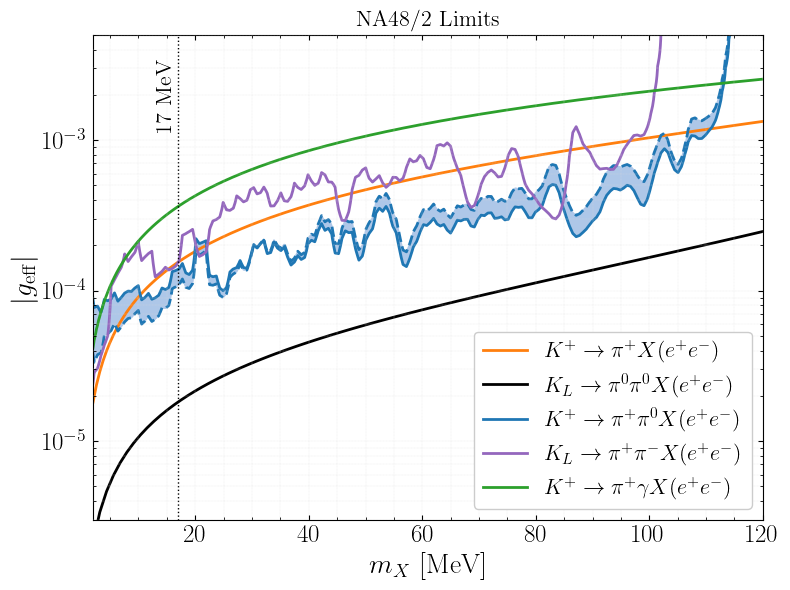

In [17]:
from matplotlib.lines import Line2D
cmap = plt.get_cmap('tab20')


###################################################
# Load in all the limits

# K -> pi0 pi0
KTeV_KL_to_pi0pi0_limits = np.genfromtxt("limits/KTeV_KL_pi0pi0_X_limits.txt")


###################################################
# Load in K+ to Pi+ X limits
NA48_KPlus_to_PiPlusX_limits = np.genfromtxt("limits/NA48_KPlus_to_PiPlus_X_limits.txt")


###################################################
# K+ to Pi+ gamma X limits
chi2_dat_KPlusGammaX = np.genfromtxt("limits/NA48_KtoGammaPiX_ee_chi2_grid.txt")

m_dat_rad = chi2_dat_KPlusGammaX[:,0]
g_dat_rad = chi2_dat_KPlusGammaX[:,1]

m_unique_rad = np.unique(m_dat_rad)
# look in slices of constant m and subtract the min chi2 value
for m in m_unique_rad:
    mask = (m_dat_rad == m)
    chi2_dat_KPlusGammaX[mask,2] = chi2_dat_KPlusGammaX[mask,2] - min(chi2_dat_KPlusGammaX[mask,2])


chi2_Kplus_rad = chi2_dat_KPlusGammaX[:,2]


###################################################
# K+ to Pi+ Pi0 limits
chi2_dat = np.genfromtxt("limits/NA48-2_KPlus_limits.txt")

m_dat = chi2_dat[:,0]
g_dat = chi2_dat[:,1]

m_unique = np.unique(m_dat)
# look in slices of constant m and subtract the min chi2 value
for m in m_unique:
    mask = (m_dat == m)
    chi2_dat[mask,2] = chi2_dat[mask,2] - min(chi2_dat[mask,2])
    chi2_dat[mask,3] = chi2_dat[mask,3] - min(chi2_dat[mask,3])
    chi2_dat[mask,4] = chi2_dat[mask,4] - min(chi2_dat[mask,4])

ib_chi2 = chi2_dat[:,2]
m_chi2 = chi2_dat[:,4]

###################################################
# KL to Pi+ Pi- limits
chi2_dat_KLpippim = np.genfromtxt("limits/NA48-2_KL_pip_pim_limits_recalc.txt")

m_dat_2 = chi2_dat_KLpippim[:,0]
g_dat_2 = chi2_dat_KLpippim[:,1]

m_unique_2 = np.unique(m_dat_2)
# look in slices of constant m and subtract the min chi2 value
for m in m_unique_2:
    mask = (m_dat_2 == m)
    chi2_dat_KLpippim[mask,2] = chi2_dat_KLpippim[mask,2] - min(chi2_dat_KLpippim[mask,2])


chi2_KLpippim = chi2_dat_KLpippim[:,2]


###################################################
# Combine the limits and plot

# K+
MX, G = np.meshgrid(np.unique(m_dat),np.unique(g_dat))
CHI2_IB = np.reshape(ib_chi2, (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))
CHI2_M = np.reshape(m_chi2, (np.unique(m_dat).shape[0],np.unique(g_dat).shape[0]))

# K+ rad
MX_RAD, G_RAD = np.meshgrid(np.unique(m_dat_rad),np.unique(g_dat_rad))
CHI2_RAD = np.reshape(chi2_Kplus_rad, (np.unique(m_dat_rad).shape[0],np.unique(g_dat_rad).shape[0]))

# KL
MX2, G2 = np.meshgrid(np.unique(m_dat_2),np.unique(g_dat_2))
CHI2_KL_PIP_PIM = np.reshape(chi2_KLpippim, (np.unique(m_dat_2).shape[0],np.unique(g_dat_2).shape[0]))

CL = 2.3
CL2_1PARAM = 9.0
CL2 = 6.18
CL3 = 11.83



###################################################
# Begin figure

colors = ["k", cmap(0), cmap(2), cmap(8), cmap(4), cmap(6), cmap(10)]
box_colors = ["gainsboro", cmap(1), cmap(3), cmap(9), cmap(5), cmap(7), cmap(11)]

fig, ax = plt.subplots(figsize=(8,6))    

y_min = 3e-6
y_max = 5e-3

###################################################
# Plot contours and lines for limits for K+ and KL

# KPlus to Pi+ X
ax.plot(NA48_KPlus_to_PiPlusX_limits[:,0], NA48_KPlus_to_PiPlusX_limits[:,1],
        color=colors[2], linewidth=2.0, linestyle='solid')

# KL to pi0 pi0
ax.plot(KTeV_KL_to_pi0pi0_limits[:,0], KTeV_KL_to_pi0pi0_limits[:,1],
        color=colors[0], linewidth=2.0, linestyle='solid')

# K+ to pi+ pi0
c_ib = ax.contour(MX, G, CHI2_IB.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[1]],
                    alpha=1.0, linewidths=2.0, linestyles=['solid'])

c_m = ax.contour(MX, G, CHI2_M.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[1]],
                    alpha=1.0, linewidths=2.0, linestyles=['dashed'])

# KL to pi+ pi-
c_kl = ax.contour(MX2, G2, CHI2_KL_PIP_PIM.transpose(),
                    levels=[CL2_1PARAM], colors=[colors[3]], alpha=1.0, linewidths=2.0, linestyles=['solid'])

# K+ to gamma pi X
c_rad = ax.contour(MX_RAD, G_RAD, CHI2_RAD.transpose(),
                    levels=[CL2], colors=[colors[4]],
                    alpha=1.0, linewidths=2.0, linestyles=['solid', 'dashed', 'dotted', 'dotted'])


# fill between two contour lines
def extract_contour_paths(contour_obj):
    polygons = []
    for seg in contour_obj.allsegs[0]:
        tmp_x = seg[:,0]
        tmp_y = seg[:,1]
    return polygons

c_m_lines_x = c_m.allsegs[0][0][:,0]
c_m_lines_y = c_m.allsegs[0][0][:,1]
c_ib_lines_x = c_ib.allsegs[0][0][:,0]
c_ib_lines_y = c_ib.allsegs[0][0][:,1]

# extract paths from contour
def interp_m(mX):
    return np.interp(mX, c_m_lines_x, c_m_lines_y)

def interp_ib(mX):
    return np.interp(mX, c_ib_lines_x, c_ib_lines_y)

mX_vals = np.linspace(0.0, 120.0, 1000)

plt.fill_between(mX_vals, interp_m(mX_vals), interp_ib(mX_vals), color=box_colors[1])


# Plot markers and text
ax.vlines(17.0, ymin=y_min, ymax=y_max, linewidth=1.0, color='k', alpha=1.0, linestyle='dotted')
ax.text(13.0, 1.2e-3, "17 MeV", rotation=90.0, fontsize=16)

ax.set_yscale('log')
ax.set_title(r"NA48/2 Limits", fontsize=16)
ax.set_xlabel(r"$m_X$ [MeV]", fontsize=20)
#ax.set_ylabel(r"$|2 g_u^A + g_d^A + g_s^A|$", fontsize=20)
ax.set_ylabel(r"$|g_{\rm eff}|$", fontsize=20)

# text boxes
# $g_{\rm eff} = 5 g_d^A + g_s^A - 2 g_u^A$  K+
#  2 g_u^A + g_d^A + g_s^A K_L pi+ pi-

"""
ax.text(40, 1.5e-3, r"$g_{\rm eff} = g_{K\pi^+\pi^-}^X$",
        fontsize=16, bbox=dict(boxstyle='round', facecolor=cmap(7), alpha=1.0))
ax.text(28, 8e-5, r"$g_{\rm eff} = g_{K\pi^+\pi^0}^X$",
        fontsize=16, bbox=dict(boxstyle='round', facecolor=cmap(3), alpha=1.0))
ax.text(23, 1.4e-5, r"$g_{\rm eff} = g_{K\pi^0 \pi^0}^X$",
        fontsize=16, bbox=dict(boxstyle='round', facecolor=cmap(14), alpha=1.0))
"""
# on $K^\pm \to \pi^\pm \pi^0 X(e^+ e^-)$

# Set the grids
ax.grid(True, linestyle='--', which="both", linewidth=0.2, alpha=1.0, color='gainsboro')
ax.minorticks_on()

# Major ticks (all sides)
ax.tick_params(axis='both', which='major',
            direction='in',
            labelsize=18,
            top=True, bottom=True, left=True, right=True)

# Minor ticks (all sides)
ax.tick_params(axis='both', which='minor',
            direction='in',
            top=True, bottom=True, left=True, right=True)
ax.set_axisbelow(False)  # <-- added


custom_lines = [Line2D([0], [0], color=colors[2], lw=2.0),
                Line2D([0], [0], color=colors[0], lw=2.0),
                Line2D([0], [0], color=colors[1], lw=2.0),
                Line2D([0], [0], color=colors[3], lw=2.0),
                Line2D([0], [0], color=colors[4], lw=2.0)]

ax.set_ylim((y_min, y_max))
ax.set_xlim((2.0,120.0))
plt.legend(custom_lines, [r"$K^+ \to \pi^+ X(e^+ e^-)$",
                          r"$K_L \to \pi^0 \pi^0 X(e^+ e^-)$",
                          r"$K^+ \to \pi^+ \pi^0 X(e^+ e^-)$",
                          r"$K_L \to \pi^+ \pi^- X(e^+ e^-)$",
                          r"$K^+ \to \pi^+ \gamma X(e^+ e^-)$"],
                          framealpha=1.0, loc="lower right", fontsize=16, ncols=1)

plt.tight_layout()
plt.savefig("plots/NA48_combined_limits_mX_v2.pdf")
plt.show()

